<a href="https://colab.research.google.com/github/vinothkumarpy/PIZCARDX/blob/main/pIZ_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1769 sha256=ad1c75844e9e37941de27bcf89a8d93850a4ff2c65be39b95005cbe50d730ea9
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=b6251bb5ce26e1924c1d01b2635f387163793e57aac9c0449d4d8ca553928302
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31664 sha256=765304927b81e14c4c723e92288fce8df21a42702c8181e0c7b13d999b6570e3
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sql

In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.5 MB/s eta 0:00:00


**### upload the image and extact the text**

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Saving 2.png to 2.png
Amit kumar
CEO & FOUNDER
123-456-7569
hello@global.com
WWW
global.com
123 global
Erode,
GLOBAL
TamilNadu 600115
INSURANCE
St ,


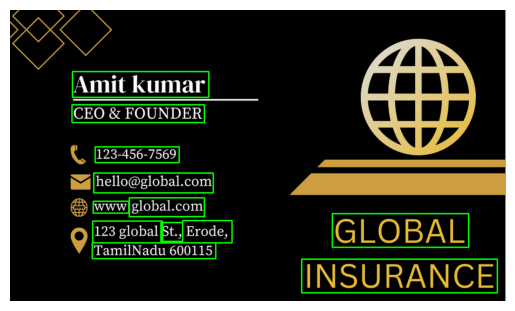

In [3]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

reader = easyocr.Reader(['en'])

uploaded = files.upload()



uploaded_file_name = list(uploaded.keys())[0]

image = cv2.imread(uploaded_file_name)

result = reader.readtext(image)

for detection in result:
    text = detection[1]
    box = detection[0]


    top_left = tuple(map(int, box[0]))
    bottom_right = tuple(map(int, box[2]))


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    print(text)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [19]:
import pandas as pd
extracted_text_list = [detection[1] for detection in result]
extracted_text_list

['Amit kumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'WWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'TamilNadu 600115',
 'INSURANCE',
 'St ,']

In [21]:
df = pd.DataFrame(extracted_text_list, columns=['Data'])
real_data = df.transpose()
real_data

,0,1,2,3,4,5,6,7,8,9,10,11
Data,Amit kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW,global.com,123 global,"Erode,",GLOBAL,TamilNadu 600115,INSURANCE,"St ,"


In [8]:
import pandas as pd


extracted_text_list = extracted_text_list

modified_data = df.transpose()

while True:
    name_to_replace = input("Enter the name to replace (or 'done' Or 'finish' to finish): ")
    if name_to_replace.lower() == 'done' or name_to_replace.lower() == 'finish':
        break

    new_name = input("Enter the new name: ")

    modified_data.loc['Data'] = real_data.loc['Data'].replace(name_to_replace, new_name)

print(modified_data)

Enter the name to replace (or 'done' Or 'finish' to finish): Amit kumar
Enter the new name: Vinoth kumar
Enter the name to replace (or 'done' Or 'finish' to finish): done
                0              1             2                 3    4   \
Data  Vinoth kumar  CEO & FOUNDER  123-456-7569  hello@global.com  WWW   

              5           6       7       8                 9          10  \
Data  global.com  123 global  Erode,  GLOBAL  TamilNadu 600115  INSURANCE   

        11  
Data  St ,  


In [9]:
modified_data

,0,1,2,3,4,5,6,7,8,9,10,11
Data,Vinoth kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW,global.com,123 global,"Erode,",GLOBAL,TamilNadu 600115,INSURANCE,"St ,"


In [27]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('pixcard_vk.db')

real_data.to_sql('Actual_data', conn, index=False, if_exists='replace')
query = "SELECT * FROM Actual_data"

df_org = pd.read_sql_query(query, conn)

conn.commit()
conn.close()
print(df_org)

            0              1             2                 3    4           5  \
0  Amit kumar  CEO & FOUNDER  123-456-7569  hello@global.com  WWW  global.com   

            6       7       8                 9         10    11  
0  123 global  Erode,  GLOBAL  TamilNadu 600115  INSURANCE  St ,  


In [28]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('pixcard_vk.db')

modified_data.to_sql('Modified_data', conn, index=False, if_exists='replace')
query = "SELECT * FROM Modified_data"

df_mod = pd.read_sql_query(query, conn)

conn.commit()
conn.close()
print(df_mod)

              0              1             2                 3    4  \
0  Vinoth kumar  CEO & FOUNDER  123-456-7569  hello@global.com  WWW   

            5           6       7       8                 9         10    11  
0  global.com  123 global  Erode,  GLOBAL  TamilNadu 600115  INSURANCE  St ,  
